# Market Basket Analysis For e-Commerce Store

### Introduction

`Market Basket Analysis` is a technique used by large retailers to uncover associations between items. It works by looking for combinations of items that occur together frequently in transactions, providing information to understand the purchase behavior. 

The outcome of this type of technique is, in simple terms, a set of rules that can be understood as `“if this, then that”`

Understanding these buying patterns can help to increase sales in several ways. If there is a pair of items, `X` and `Y`, that are frequently bought together:
```
✓ X and Y can be placed on the same shelf, so that buyers of one item would be prompted to buy the other.
✓ Promotional discounts could be applied to just one out of the two items.
✓ Advertisements on X could be targeted at buyers who purchase Y.
✓ X and Y could be combined into a new product, such as having Y in flavors of X.
```

### Project Contents

* Data Loading, Cleaning and preprocessing
* Feature Engineering
* Exploratory Analysis
* Apriori Algorithm Application


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### Load Dataset

In [2]:
df = pd.read_csv(r"../Market Basket Analysis/Market Basket Analysis - Groceries_dataset.csv")


### View Data Contents and Information

In [3]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
df.shape

(38765, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [6]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [7]:
df["Member_number"].nunique()

3898

In [8]:
df["Date"].nunique()

728

In [9]:
df["itemDescription"].nunique()

167

### Check Data Quality

In [10]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [11]:
df.duplicated().sum()

759

In [12]:
df.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [13]:
# convert the 'Date' column to datetime format
df['Date'] = df['Date'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [14]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


### Quick overview of Each Column

In [15]:
# from ydata_profiling import ProfileReport


# profile = ProfileReport(df, title="Profiling Report")
# profile

In [16]:
df.Date.min(), df.Date.max()

(Timestamp('2014-01-01 00:00:00'), Timestamp('2015-12-30 00:00:00'))

## Exploratory Analysis

## <b>1. Out of the 167 items in this supermarket, what are the frequently purchased items?</b>

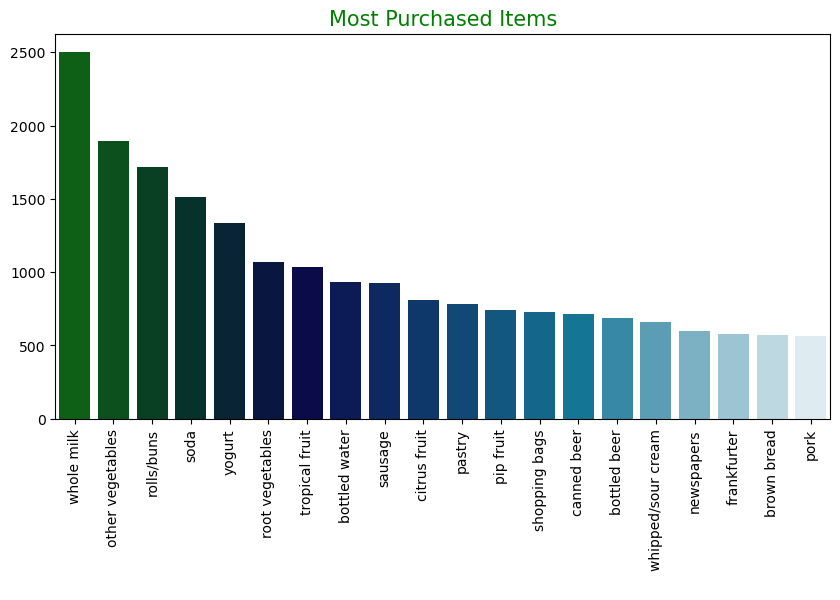

In [17]:
#most_purchased = df.itemDescription.value_counts().head(20)
plt.figure(figsize=(10, 5))

sns.barplot(x=df["itemDescription"].value_counts().head(20).index,y=df["itemDescription"].value_counts().head(20).values, data=df, palette="ocean")

plt.title("Most Purchased Items", size=15, color="green")
plt.xlabel(" ")
plt.xticks(rotation=90)
plt.show()

<b>The supermarket recorded most purchase of `whole milk` with significant high demand compared to other frequently purchased items</b>

/Users/mrsgracejidael/Anaconda/anaconda3/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


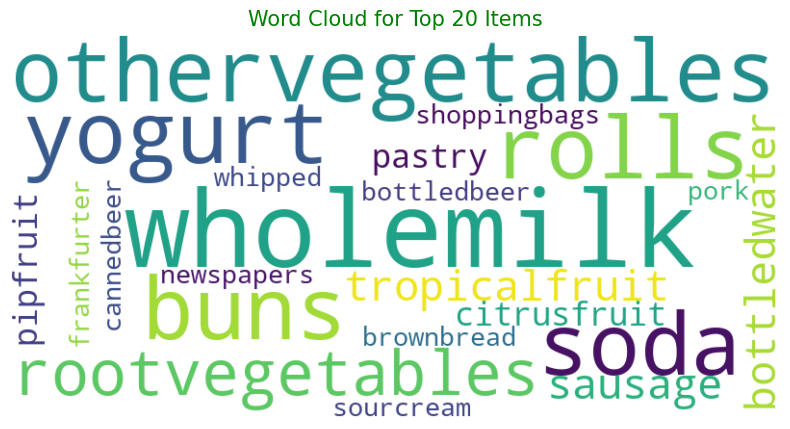

In [18]:
from wordcloud import WordCloud


top_items = df["itemDescription"].value_counts().head(20)

# Word cloud for the top 20 items

def remove(string):
    return string.replace(" ", "")


top_items = list(map(remove, list(top_items.index)))

top_items_text = ' '.join(top_items)
wordcloud = WordCloud(width=800, height=400, background_color='white', relative_scaling=0).generate(top_items_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top 20 Items', size=15, color="green")
plt.show()


## <b>2. Can we see a trend of sales from 2014 till 2015?</b>

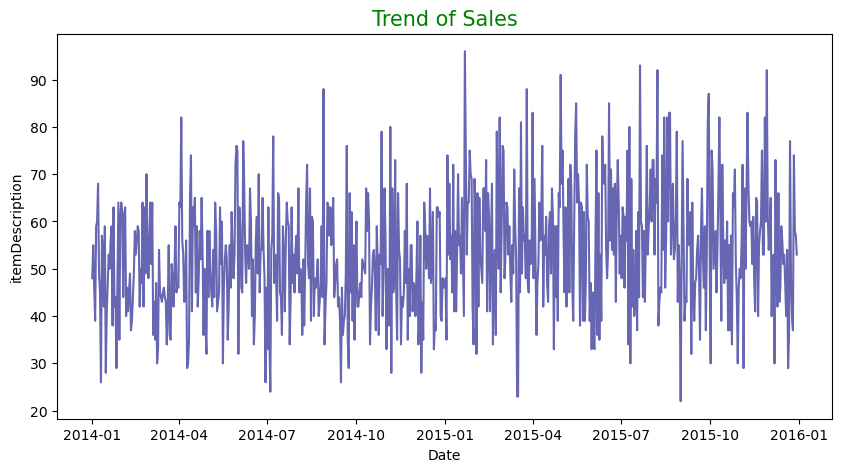

In [20]:
plt.figure(figsize=(10, 5))
a = df.groupby(["Date"]).agg({"itemDescription":"count"})
#sns.lineplot(kind="line", color="navy", alpha=0.6)
sns.lineplot(x="Date", y="itemDescription", data=a, color="navy", alpha=0.6)
plt.title("Trend of Sales", size=15, color="green")
plt.show()

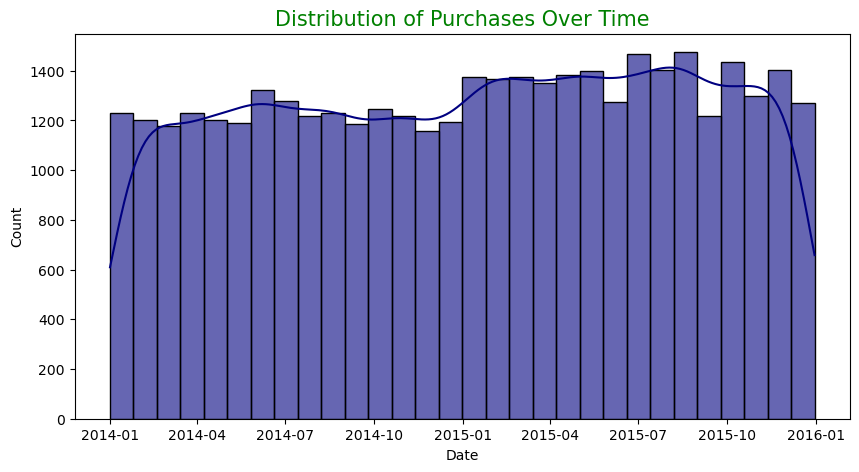

In [21]:
# Distribution of purchases over time
plt.figure(figsize=(10, 5))
sns.histplot(df['Date'], bins=30, kde=True, color="navy", alpha=0.6)

plt.title('Distribution of Purchases Over Time', size=15, color="green")
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

<b>The supermarket have recorded a rather alternating, yet steady growth between 2014 and 2015, this growth difference can be further analysed yearly</b>

In [22]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


In [24]:
# Feature Engineering
df["year"] = df["Date"].dt.year
df["quarter"] = df["Date"].dt.quarter
df["month"] = df["Date"].dt.month

df.head()

,Member_number,Date,itemDescription,year,quarter,month
0,1808,2015-07-21,tropical fruit,2015,3,7
1,2552,2015-01-05,whole milk,2015,1,1
2,2300,2015-09-19,pip fruit,2015,3,9
3,1187,2015-12-12,other vegetables,2015,4,12
4,3037,2015-02-01,whole milk,2015,1,2


In [25]:
df.shape

(38765, 6)

In [26]:
df2 = df.groupby(["year", "quarter", "month"]).agg({"itemDescription":"count"}).reset_index()
df2 = df2.rename(columns = {"itemDescription":"purchase_count"})
df2

,year,quarter,month,purchase_count
0,2014,1,1,1527
1,2014,1,2,1437
2,2014,1,3,1411
3,2014,2,4,1561
4,2014,2,5,1615
5,2014,2,6,1570
6,2014,3,7,1576
7,2014,3,8,1575
8,2014,3,9,1472
9,2014,4,10,1591


In [27]:
df2.groupby(["year"]).agg({"purchase_count":"mean"}).reset_index()

,year,purchase_count
0,2014,1523.083333
1,2015,1707.333333


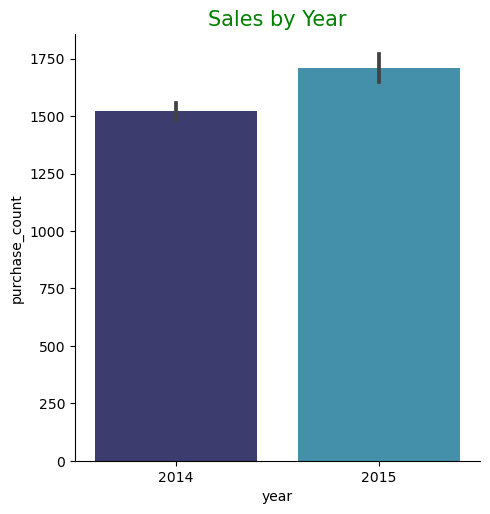

In [28]:
sns.catplot(x='year',y="purchase_count",data=df2,kind='bar', palette="ocean", alpha=0.8)

plt.title("Sales by Year", size=15, color="green")
plt.show()

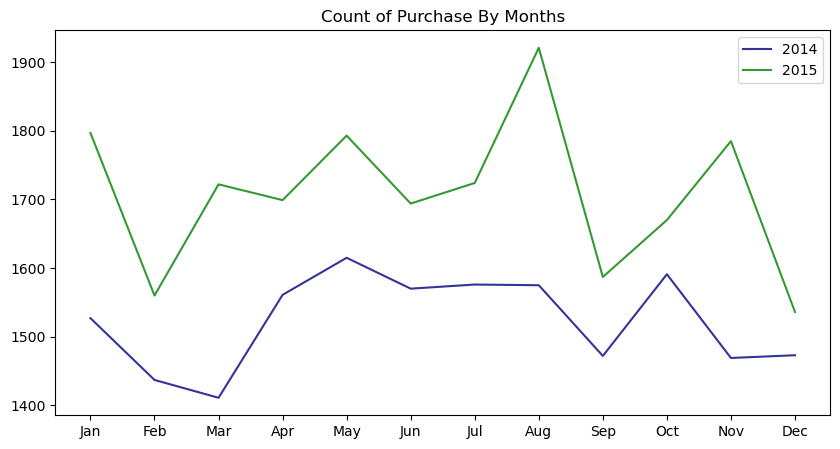

In [29]:
df2_2014 = df2.loc[df2["year"]== 2014]
df2_2015 = df2.loc[df2["year"] == 2015]


#sns.lineplot(x="month", y="purchase_count", data=df2_2014)
plt.figure(figsize=(10, 5))
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.plot(df2_2014["month"], df2_2014["purchase_count"], color="navy", label='2014', alpha =0.8)
plt.plot(df2_2015["month"], df2_2015["purchase_count"], color='g', label='2015', alpha=0.8)

plt.title("Count of Purchase By Months")
plt.xticks(df2_2014["month"],months)
plt.legend(loc="best") 
plt.show()

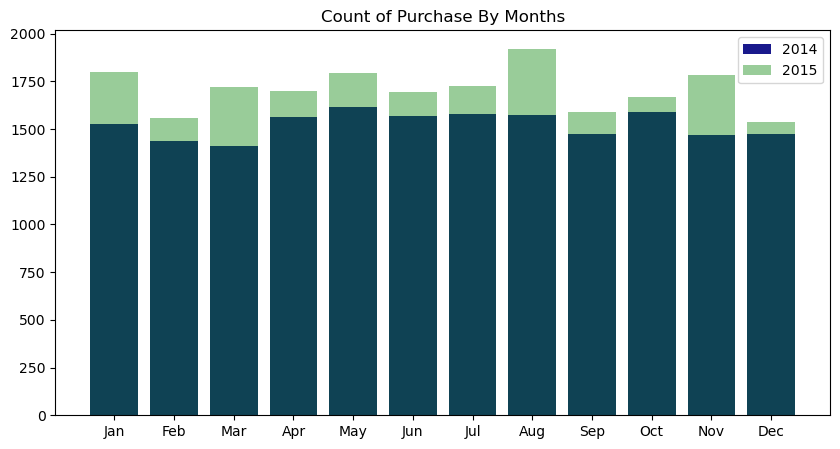

In [30]:
plt.figure(figsize=(10, 5))
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.bar(df2_2014["month"], df2_2014["purchase_count"], color="navy", label='2014', alpha =0.9)
plt.bar(df2_2015["month"], df2_2015["purchase_count"], color='g', label='2015', alpha=0.4)

plt.title("Count of Purchase By Months")
plt.xticks(df2_2014["month"],months)
plt.legend(loc="best") 
plt.show()

In [31]:
df2.groupby(["year"]).agg({"purchase_count":"sum"}).reset_index()

,year,purchase_count
0,2014,18277
1,2015,20488


In [32]:
yearly_purchase = pd.DataFrame(df2.groupby(["year"]).agg({"purchase_count":"sum"}).reset_index())

(yearly_purchase.loc[yearly_purchase["year"] == 2015, ["purchase_count"]].values - yearly_purchase.loc[yearly_purchase["year"] == 2014, ["purchase_count"]].values ) / yearly_purchase.loc[yearly_purchase["year"] == 2014, ["purchase_count"]].values * 100

array([[12.09717131]])

<b>Indeed, there is an increase by 12% of customer purchase from the supermarket from 18,277 in 2014 to 20,488 in 2015 </b>

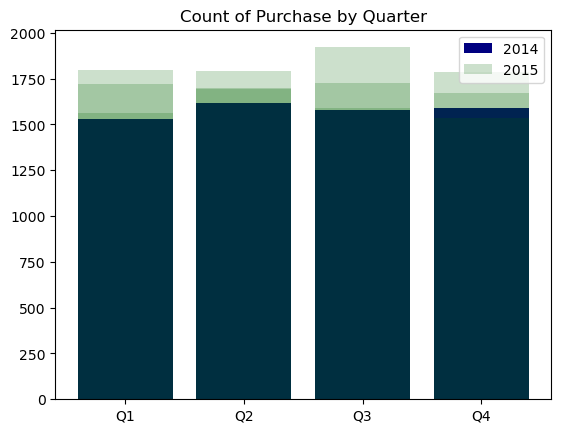

In [33]:
quarter = ["Q1", "Q2", "Q3", "Q4"]

plt.bar(df2_2014["quarter"], df2_2014["purchase_count"], color="navy", label='2014', alpha =1)
plt.bar(df2_2015["quarter"], df2_2015["purchase_count"], color='darkgreen', label='2015', alpha=0.2)

plt.title("Count of Purchase by Quarter")
plt.xticks(df2_2014["quarter"].unique(),quarter)
plt.legend(loc="best") 
plt.show()

In [34]:
df2.groupby(["year", "quarter"]).agg({"purchase_count":"mean"}).reset_index()

,year,quarter,purchase_count
0,2014,1,1458.333333
1,2014,2,1582.000000
2,2014,3,1541.000000
3,2014,4,1511.000000
4,2015,1,1693.000000
5,2015,2,1728.666667
6,2015,3,1744.000000
7,2015,4,1663.666667


## Market basket analysis

In [35]:
df.head()

,Member_number,Date,itemDescription,year,quarter,month
0,1808,2015-07-21,tropical fruit,2015,3,7
1,2552,2015-01-05,whole milk,2015,1,1
2,2300,2015-09-19,pip fruit,2015,3,9
3,1187,2015-12-12,other vegetables,2015,4,12
4,3037,2015-02-01,whole milk,2015,1,2


### Preparing Data for Modeling



In [36]:
df_sorted =  df[["Member_number", "itemDescription"]].sort_values(by="Member_number", ascending=False)
df_sorted.head()

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables


In [37]:
#taking out whitespaces
df_sorted["itemDescription"] = df["itemDescription"].str.strip()

In [38]:
df_grouped = df_sorted.groupby(['Member_number'])['itemDescription'].apply(list).reset_index(name='basket')
df_grouped.head()

,Member_number,basket
0,1000,"[misc. beverages, sausage, soda, yogurt, salty..."
1,1001,"[beef, sausage, frankfurter, soda, whipped/sou..."
2,1002,"[specialty chocolate, butter, whole milk, butt..."
3,1003,"[dental care, rolls/buns, rolls/buns, frozen m..."
4,1004,"[frozen fish, shopping bags, hygiene articles,..."


In [39]:
df_grouped["basket"][0]

['misc. beverages',
 'sausage',
 'soda',
 'yogurt',
 'salty snack',
 'pastry',
 'canned beer',
 'hygiene articles',
 'whole milk',
 'pickled vegetables',
 'sausage',
 'semi-finished bread',
 'whole milk']

In [40]:
quantity_per_transact = df.groupby(['Member_number' , 'itemDescription']).size().reset_index(name='basket')
    
quantity_per_transact.head(11)

,Member_number,itemDescription,basket
0,1000,canned beer,1
1,1000,hygiene articles,1
2,1000,misc. beverages,1
3,1000,pastry,1
4,1000,pickled vegetables,1
5,1000,salty snack,1
6,1000,sausage,2
7,1000,semi-finished bread,1
8,1000,soda,1
9,1000,whole milk,2


In [41]:
df_pivot = quantity_per_transact.pivot_table(index=['Member_number'],columns='itemDescription',values='basket',fill_value=0)

df_pivot

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df_pivot["whole milk"].head(20)

Member_number
1000    2.0
1001    2.0
1002    1.0
1003    0.0
1004    3.0
1005    0.0
1006    2.0
1008    0.0
1009    0.0
1010    0.0
1011    1.0
1012    1.0
1013    2.0
1014    2.0
1015    1.0
1016    0.0
1017    0.0
1018    0.0
1019    0.0
1020    0.0
Name: whole milk, dtype: float64

In [43]:
# we dont need quantity sum 
# we need either has taken or not 
# so if user has taken that item mark as 1 else mark as 0.

def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

In [44]:
basket_set = df_pivot.applymap(convert_into_binary)


In [45]:
basket_set

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# to confirm

basket_set["whole milk"].head(20)

Member_number
1000    1
1001    1
1002    1
1003    0
1004    1
1005    0
1006    1
1008    0
1009    0
1010    0
1011    1
1012    1
1013    1
1014    1
1015    1
1016    0
1017    0
1018    0
1019    0
1020    0
Name: whole milk, dtype: int64

### Frequent itemset

Frequent itemsets are the ones which occur at least a minimum number of times in the transactions. Technically, these are the itemsets for which support value (fraction of transactions containing the itemset) is above a minimum threshold — min_support. We have kept min_support=0.07 in our code below.

So, {Bread, Notebook} might not be a frequent itemset if it occurs only 2 times out of 100 transactions and (2/100) = 0.02 falls below the value of min_support.

In [47]:
# call apriori function and pass minimum support here we are passing 7%. 
# means 7 times in total number of transaction the item should be present.
frequent_itemsets = apriori(basket_set, min_support=0.07, use_colnames=True)

/Users/mrsgracejidael/Anaconda/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [49]:
#it will generate frequent itemsets 
frequent_itemsets

,support,itemsets
0,0.078502,(UHT-milk)
1,0.119548,(beef)
2,0.079785,(berries)
3,0.158799,(bottled beer)
4,0.213699,(bottled water)
...,...,...
78,0.075680,"(yogurt, tropical fruit)"
79,0.079785,"(whole milk, whipped/sour cream)"
80,0.150590,"(whole milk, yogurt)"
81,0.082093,"(whole milk, other vegetables, rolls/buns)"


In [50]:
# We would apply association rules on frequent itemset. 
# here we are setting based on lift and keeping minimum lift as 1

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(bottled beer),0.458184,0.158799,0.085428,0.186450,1.174124,0.012669,1.033988,0.273711
1,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672,0.176297
2,(bottled water),(other vegetables),0.213699,0.376603,0.093894,0.439376,1.166680,0.013414,1.111969,0.181695
3,(other vegetables),(bottled water),0.376603,0.213699,0.093894,0.249319,1.166680,0.013414,1.047450,0.229175
4,(bottled water),(rolls/buns),0.213699,0.349666,0.079271,0.370948,1.060863,0.004548,1.033832,0.072964
...,...,...,...,...,...,...,...,...,...,...
93,"(whole milk, other vegetables)",(yogurt),0.191380,0.282966,0.071832,0.375335,1.326434,0.017678,1.147870,0.304344
94,"(yogurt, other vegetables)",(whole milk),0.120318,0.458184,0.071832,0.597015,1.303003,0.016704,1.344507,0.264348
95,(whole milk),"(yogurt, other vegetables)",0.458184,0.120318,0.071832,0.156775,1.303003,0.016704,1.043235,0.429190
96,(yogurt),"(whole milk, other vegetables)",0.282966,0.191380,0.071832,0.253853,1.326434,0.017678,1.083727,0.343217


In [51]:
rules.sort_values(["confidence", "lift", "zhangs_metric"], axis = 0, ascending = False).head(20)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
94,"(yogurt, other vegetables)",(whole milk),0.120318,0.458184,0.071832,0.597015,1.303003,0.016704,1.344507,0.264348
88,"(other vegetables, rolls/buns)",(whole milk),0.146742,0.458184,0.082093,0.559441,1.220996,0.014859,1.229837,0.212124
71,(shopping bags),(whole milk),0.168291,0.458184,0.091329,0.542683,1.184422,0.014220,1.184772,0.187213
1,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672,0.176297
85,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185,0.193926
11,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795,0.158299
19,(domestic eggs),(whole milk),0.133145,0.458184,0.070292,0.527938,1.152242,0.009287,1.147766,0.152421
9,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569
67,(sausage),(whole milk),0.206003,0.458184,0.106978,0.519303,1.133394,0.012591,1.127146,0.148230
21,(newspapers),(whole milk),0.139815,0.458184,0.072345,0.517431,1.129310,0.008284,1.122775,0.133115


In [52]:
rules.sort_values(["zhangs_metric"], axis = 0, ascending = False).head(20)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
95,(whole milk),"(yogurt, other vegetables)",0.458184,0.120318,0.071832,0.156775,1.303003,0.016704,1.043235,0.429190
96,(yogurt),"(whole milk, other vegetables)",0.282966,0.191380,0.071832,0.253853,1.326434,0.017678,1.083727,0.343217
97,(other vegetables),"(whole milk, yogurt)",0.376603,0.150590,0.071832,0.190736,1.266589,0.015119,1.049608,0.337631
89,(whole milk),"(other vegetables, rolls/buns)",0.458184,0.146742,0.082093,0.179171,1.220996,0.014859,1.039508,0.334055
68,(yogurt),(sausage),0.282966,0.206003,0.075423,0.266546,1.293892,0.017132,1.082545,0.316774
93,"(whole milk, other vegetables)",(yogurt),0.191380,0.282966,0.071832,0.375335,1.326434,0.017678,1.147870,0.304344
90,(other vegetables),"(whole milk, rolls/buns)",0.376603,0.178553,0.082093,0.217984,1.220834,0.014850,1.050422,0.290165
70,(whole milk),(shopping bags),0.458184,0.168291,0.091329,0.199328,1.184422,0.014220,1.038763,0.287379
69,(sausage),(yogurt),0.206003,0.282966,0.075423,0.366127,1.293892,0.017132,1.131196,0.286069
91,(rolls/buns),"(whole milk, other vegetables)",0.349666,0.191380,0.082093,0.234776,1.226753,0.015174,1.056710,0.284223


- **Antecedent and Consequent**: This are the items that are usually bought together.

- **Support**:This shows the proportion of transactions that contains the itemset.it indicates how frequently the items appear in the data.

- **Confidence**: measures the reliability of the rule.it is the probability of finding the consquent in a transaction giveen that the antecedent is present.

- **Lift**: Lift measures the likelihood of the consequent given the antecedent.A lift greater than 1 indicates a positive association.

- **Leverage**: measures the differencebetween the observed frequency of the antecedent and the consequent appearing together and the frequency that would be expeccted if they individual.

- **Conviction**:This is the ratio of the expected frequency of the occurence of antecedent if is independent of the consequent ,to the observed frequency ofthe antecedent occuring without the consequent. 

- **Zhang's metric**: it combines confidence and suport to evaluate the strength of association rules.The higher the Zhang's metric, the higher the association. `Zhang's metric combines support, confidence, and lift into a single measure.`

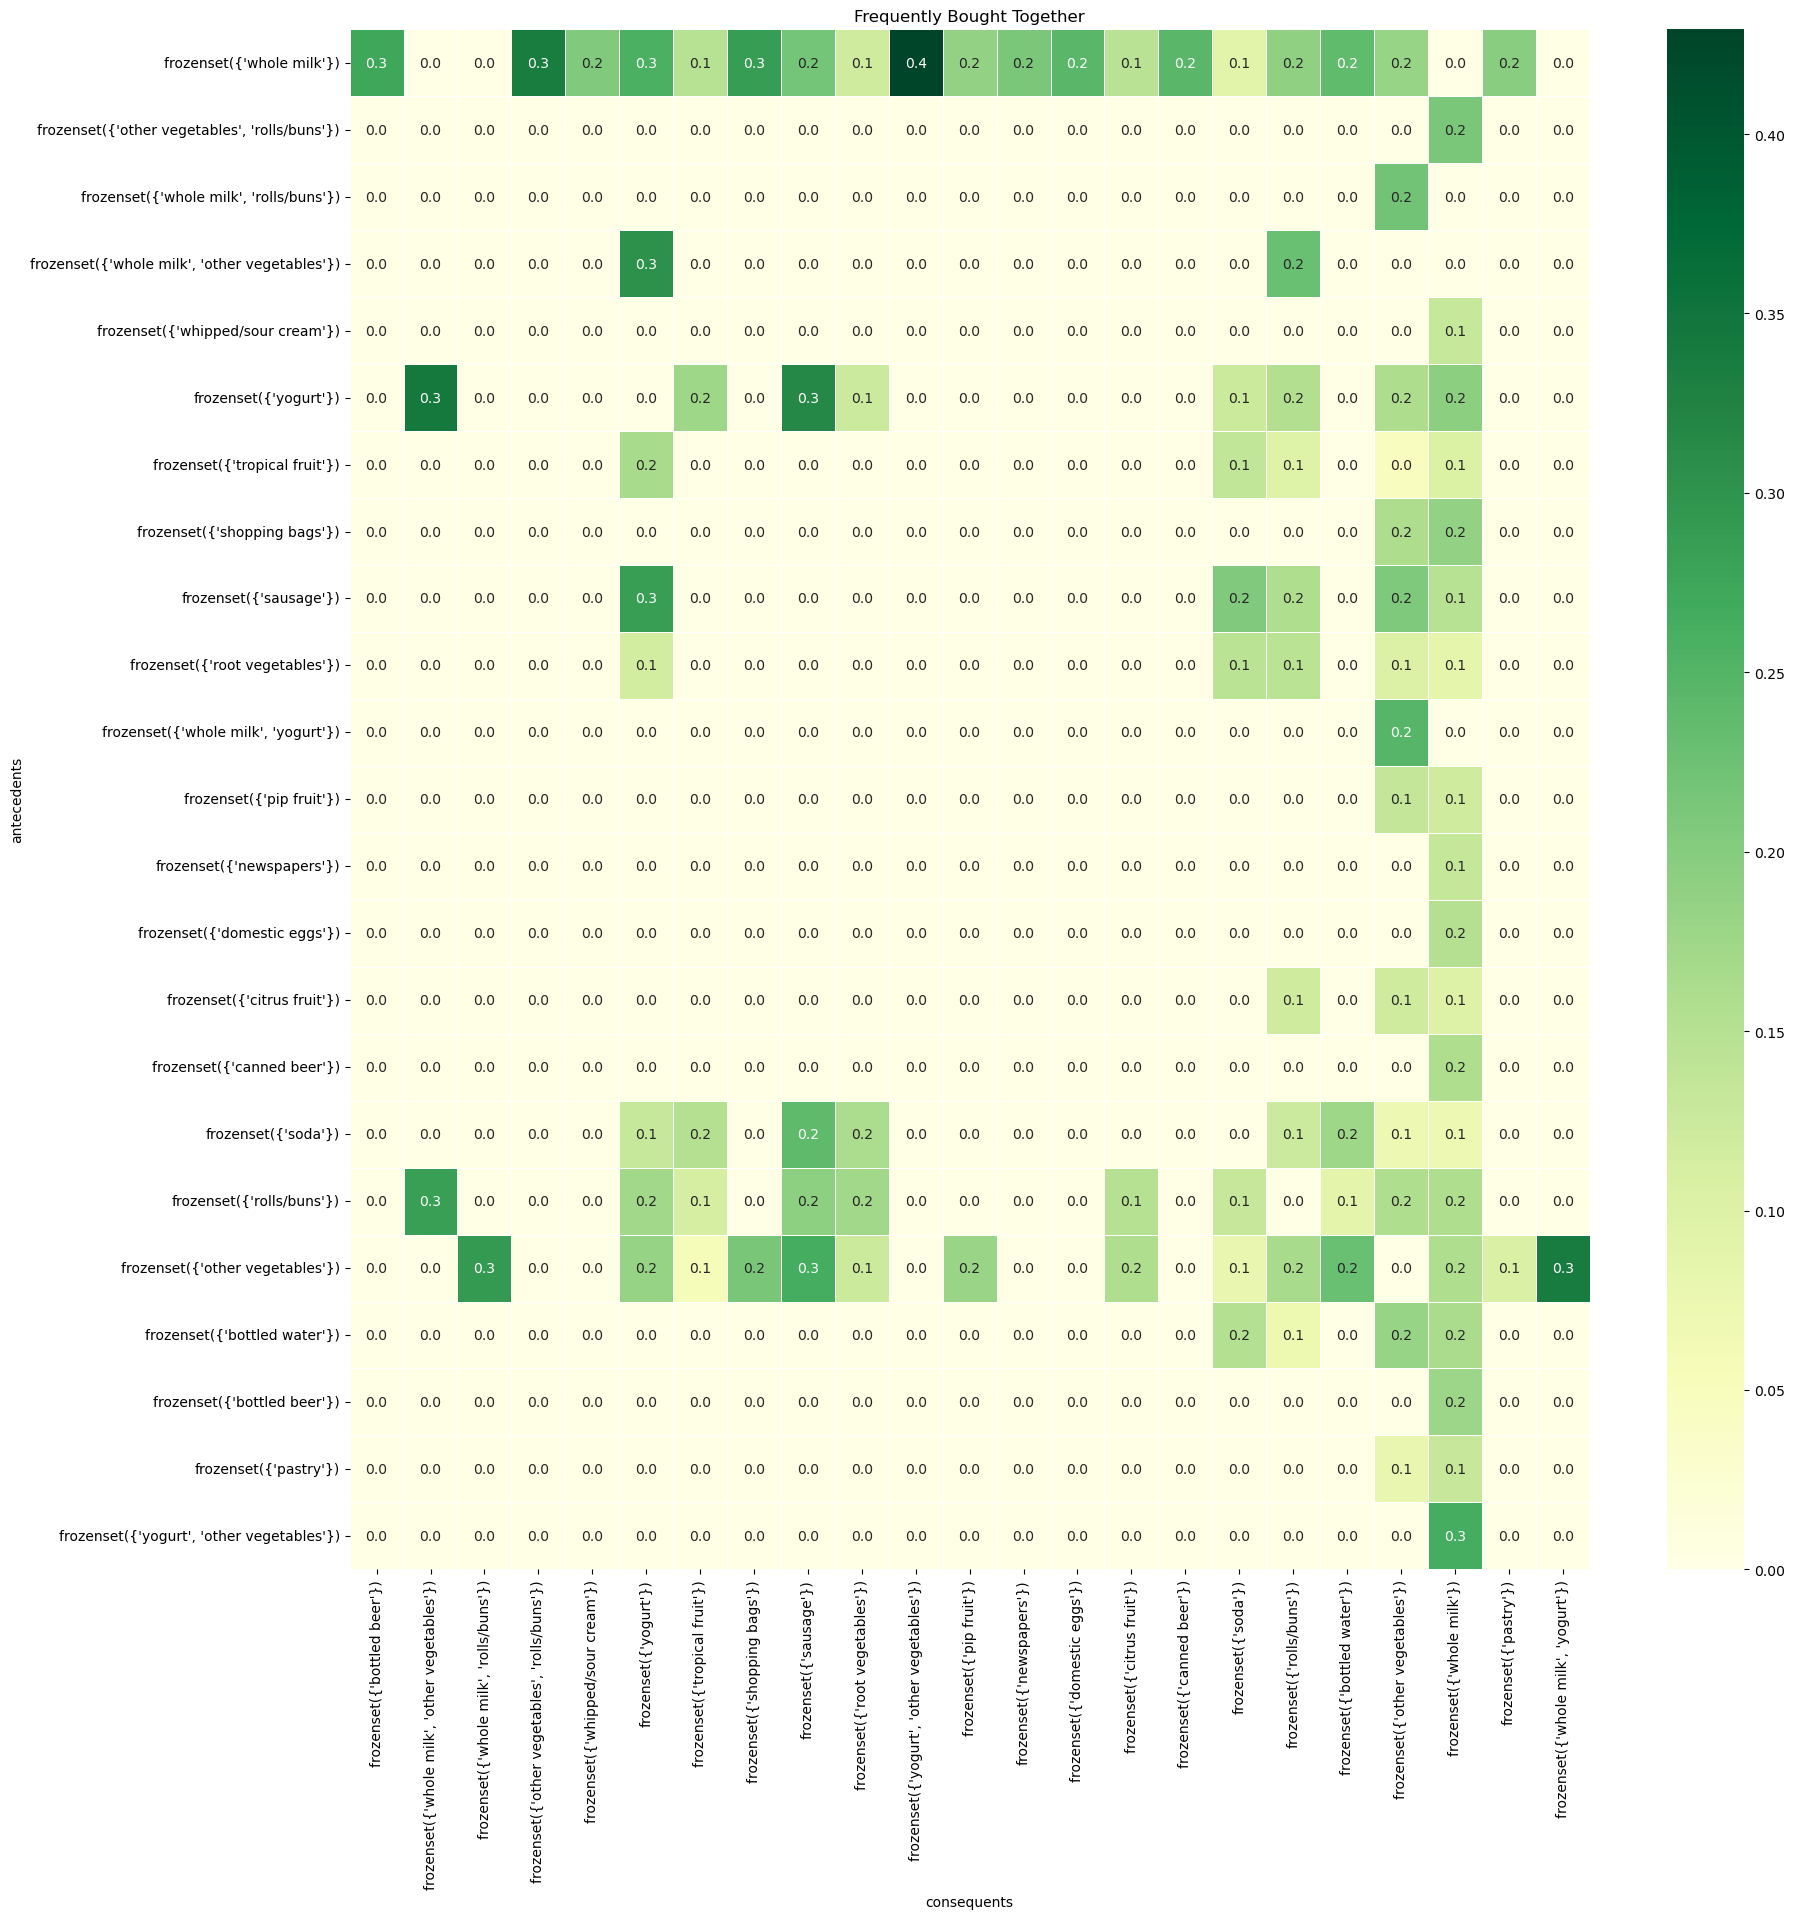

In [53]:
# Creating a matrix of  associations
association = rules.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(association, annot=True, cmap="YlGn", fmt=".1f", linewidths=.5)
plt.title("Frequently Bought Together")
plt.show()